In [113]:
import numpy as np 
import pandas as pd
import seaborn as sns
import urllib.request
import scipy.optimize as opt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv'
urllib.request.urlretrieve(url, '/Users/pramo/Desktop/IDeators/cell_samples.csv')
cell  = pd.read_csv('/Users/pramo/Desktop/IDeators/cell_samples.csv')
cell.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
cell.isnull().sum().sort_values()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [55]:
cell.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

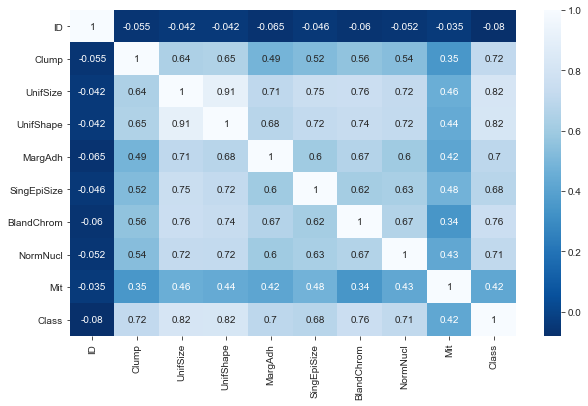

In [56]:
corr = cell.corr()
plt.figure(figsize=(10,6))
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.heatmap(corr , annot =True,cmap = "Blues_r")

In [57]:
cell.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [58]:
cell['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

[]

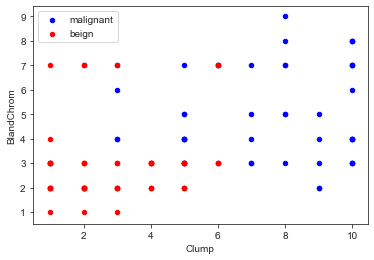

In [69]:
ax= cell[cell['Class'] == 4][0:50].plot(kind = 'scatter', y = 'BlandChrom' , x='Clump', color = 'Blue' , label = 'malignant');
cell[cell['Class']==2][0:50].plot(kind='scatter', y='BlandChrom' , x='Clump', color='Red', label = 'beign', ax= ax);
plt.plot()

In [109]:
cell.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [101]:
cell['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [102]:
cell= cell[pd.to_numeric(cell['BareNuc'], errors = 'coerce').notnull()]

In [104]:
cell['BareNuc'] = cell['BareNuc'].astype('int')

In [107]:
cell.shape

(683, 11)

In [108]:
cell['BareNuc'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [124]:
x = cell[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
y = cell['Class']

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 5) 
print('Train Shape' , x_train.shape, x_test.shape)
print('Test Shape' , y_train.shape, y_test.shape)

Train Shape (546, 9) (137, 9)
Test Shape (546,) (137,)


In [133]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [134]:
pred = clf.predict(x_test)
pred

array([2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 2], dtype=int64)

In [135]:
from sklearn.metrics import accuracy_score

In [136]:
print('Train Accuracy =', accuracy_score(y_train , clf.predict(x_train)))
print('Train Accuracy =', accuracy_score(y_test , pred))

Train Accuracy = 0.9945054945054945
Train Accuracy = 0.9708029197080292
